Lal Babu

lalbabumanipal21@gmail.com

9654943540

India-843119

In [1]:
import pandas  as pd     #import required libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [3]:
from google.colab import files
uploaded = files.upload()

Saving customer-data.csv to customer-data.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['customer-data.csv']))

In [7]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [11]:
df.drop_duplicates()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


In [12]:
df.shape

(10000, 19)

In [13]:
customer_df =df.copy()

In [15]:
list(customer_df.columns)

['id',
 'age',
 'gender',
 'race',
 'driving_experience',
 'education',
 'income',
 'credit_score',
 'vehicle_ownership',
 'vehicle_year',
 'married',
 'children',
 'postal_code',
 'annual_mileage',
 'vehicle_type',
 'speeding_violations',
 'DUIs',
 'past_accidents',
 'outcome']

In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [16]:
customer_df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [18]:
# filling null value with mean of respective columns

credit_mean=customer_df.credit_score.mean()
customer_df['credit_score']=customer_df.credit_score.fillna(credit_mean)

mileage_mean = customer_df.annual_mileage.mean()
customer_df['annual_mileage'] = customer_df.annual_mileage.fillna(mileage_mean)

In [28]:
customer_df.isnull().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

**Data Preprocessing for categorical features**

In [19]:
customer_df.age.unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

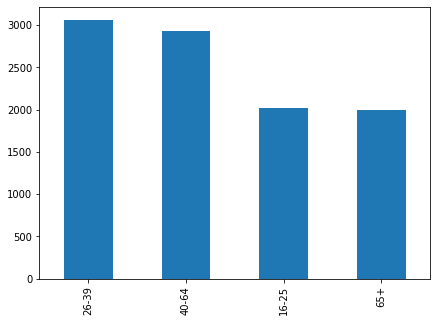

In [92]:
customer_df['age'].value_counts().plot(kind='bar',figsize=(7,5));

In [20]:
customer_df.race.unique()

array(['majority', 'minority'], dtype=object)

In [21]:
customer_df.driving_experience.unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [22]:
customer_df.education.unique()

array(['high school', 'none', 'university'], dtype=object)

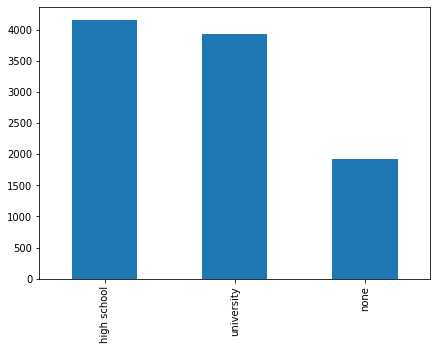

In [94]:
customer_df['education'].value_counts().plot(kind='bar',figsize=(7,5));

In [23]:
customer_df.income.unique()

array(['upper class', 'poverty', 'working class', 'middle class'],
      dtype=object)

In [24]:
customer_df.vehicle_year.unique()

array(['after 2015', 'before 2015'], dtype=object)

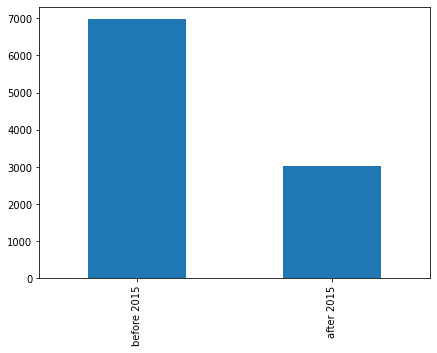

In [107]:
customer_df['vehicle_year'].value_counts().plot(kind='bar',figsize=(7,5));

In [25]:
customer_df.vehicle_type.unique()

array(['sedan', 'sports car'], dtype=object)

In [26]:
customer_df.postal_code.unique()

array([10238, 32765, 92101, 21217])

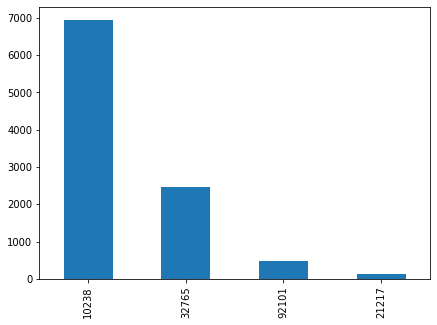

In [103]:
customer_df['postal_code'].value_counts().plot(kind='bar',figsize=(7,5));

In [118]:
customer_df.postal_code.value_counts(normalize=True)

10238    0.6940
32765    0.2456
92101    0.0484
21217    0.0120
Name: postal_code, dtype: float64

In [27]:
customer_df.describe()  #to get descriptive statistics information about numerical features

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.130752,18915.613855,2680.167384,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.431509,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.515813,10238.000000,11697.003207,0.000000,0.00000,0.000000
75%,753974.500000,0.607607,32765.000000,13000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [30]:
customer_df['outcome'].value_counts(normalize=True)

False    0.6867
True     0.3133
Name: outcome, dtype: float64

In [31]:
credit_selection=customer_df[customer_df['credit_score']<.2]
credit_selection['outcome'].value_counts(normalize=True)

True     0.602041
False    0.397959
Name: outcome, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


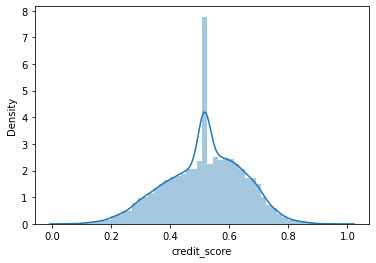

In [111]:
sns.distplot(customer_df['credit_score']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


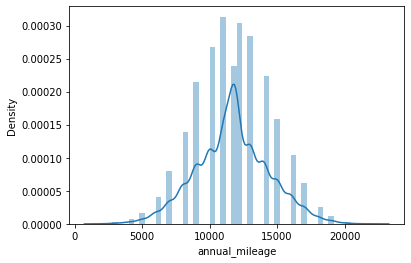

In [112]:
sns.distplot(customer_df['annual_mileage']);

In [32]:
X =customer_df[customer_df['driving_experience']=='20-29y']
X['speeding_violations'].mean()

2.734308636149127

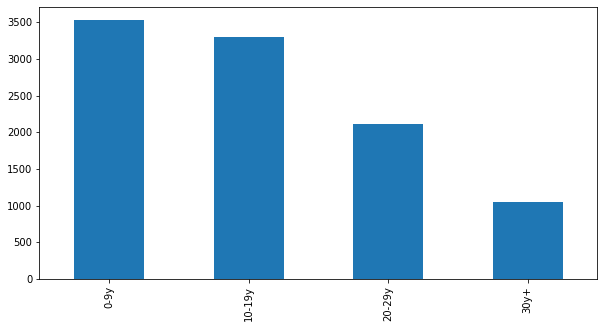

In [90]:
customer_df['driving_experience'].value_counts().plot(kind='bar',figsize=(10,5));

In [33]:
# What is the standard deviation in annual mileage?

df['annual_mileage'].unique()
df['annual_mileage'].std()

2818.4345283017233

In [34]:
customer_df['vehicle_type'].value_counts(normalize=True)

sedan         0.9523
sports car    0.0477
Name: vehicle_type, dtype: float64

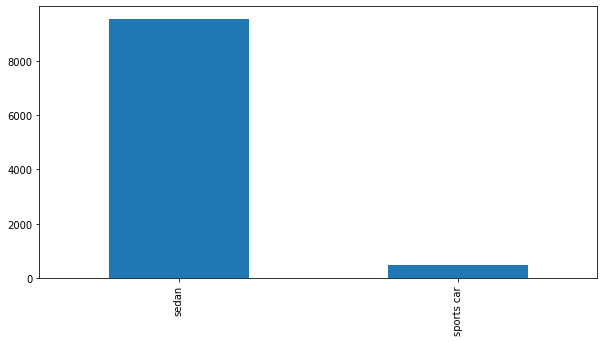

In [91]:
customer_df['vehicle_type'].value_counts().plot(kind='bar',figsize=(10,5));

data_sports = customer_df[customer_df['vehicle_type']=='sports car']
data_sports.shape

In [37]:
data_sports.outcome.value_counts(normalize=True)

False    0.675052
True     0.324948
Name: outcome, dtype: float64

little more than 32 percent has claim insurance in last year who own sports car

In [ ]:
pd.cross

In [38]:
data_sports.driving_experience.value_counts(normalize=True)

10-19y    0.371069
0-9y      0.339623
20-29y    0.207547
30y+      0.081761
Name: driving_experience, dtype: float64

In [39]:
data_sports.age.value_counts()

26-39    162
40-64    145
16-25     90
65+       80
Name: age, dtype: int64

In [40]:
data_sports.gender.value_counts()

female    239
male      238
Name: gender, dtype: int64

In [41]:
data_sports.outcome.value_counts(normalize=True)

False    0.675052
True     0.324948
Name: outcome, dtype: float64

In [42]:
data_female_sports=data_sports[data_sports['gender']=='female']
data_female_sports.outcome.value_counts(normalize=True)

False    0.757322
True     0.242678
Name: outcome, dtype: float64

In [43]:
data_male_sports=data_sports[data_sports['gender']=='male']
data_male_sports.outcome.value_counts(normalize=True)

False    0.592437
True     0.407563
Name: outcome, dtype: float64

male sports driver has claimed insurance more compare to female driver. It shows female can be preferable and potential customer for sports car insurance, 

but the available data is too less to make any assumptions

In [45]:
outcome_y= customer_df[customer_df['outcome']==True]
outcome_y.postal_code.value_counts(normalize=True)

10238    0.601979
32765    0.295883
92101    0.063837
21217    0.038302
Name: postal_code, dtype: float64

postal code with 10238 has claimed nearly 60 percent of all insurance claim

**What do claimants have in common?**


.past accidents> all have commited accidents in past

2.vehicle ownership and postal code> most of the drivers claim vehicle ownership and most of them belongs to same postal code

speeding violations> all have history of past accidents



In [114]:
data_claimant = customer_df[customer_df['outcome']==True]

data_claimants = data_claimant[['age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents']]

dc_corr=data_claimants.corr()       


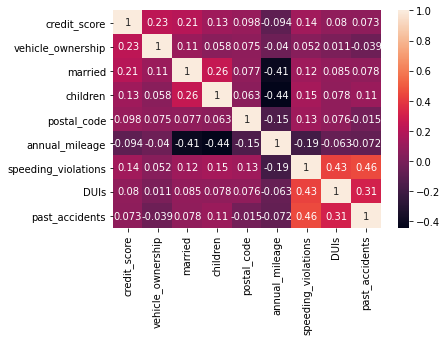

In [117]:
sns.heatmap(dc_corr,annot=True)

**# . Are there particular customer types?**

. female are equally participant in this insurance policy. By checking past history one can say, they have done less speed violations,less history of accidents and they have also claimed less in number, in past. so women can be a potential customer base

92101    0.063837
21217    0.038302
these two postal code has claimed less in number, so here selling insurance policy would be profitable

In [50]:
customer_df.gender.value_counts()

female    5010
male      4990
Name: gender, dtype: int64

In [51]:
customer_df.age.value_counts(normalize=True)

26-39    0.3063
40-64    0.2931
16-25    0.2016
65+      0.1990
Name: age, dtype: float64

In [52]:
data_claimants.age.value_counts(normalize=True)

16-25    0.462177
26-39    0.329397
40-64    0.145867
65+      0.062560
Name: age, dtype: float64

claimant below agegroup 25 is more than others. It means, need to do cautious study before selling policy to this group

In [54]:
illeter = customer_df[customer_df['education']=='none']
illeter.outcome.value_counts()

False    1012
True      903
Name: outcome, dtype: int64

Those who are not educated, giving policy to them can be risky

# Are there any problems with the data you have been given that should be kept in mind when modelling?

data have null/missing values

lot of categorical features

some features have negative correlation , so , they should be abstain from model building

In [56]:
list(customer_df.columns)

['id',
 'age',
 'gender',
 'race',
 'driving_experience',
 'education',
 'income',
 'credit_score',
 'vehicle_ownership',
 'vehicle_year',
 'married',
 'children',
 'postal_code',
 'annual_mileage',
 'vehicle_type',
 'speeding_violations',
 'DUIs',
 'past_accidents',
 'outcome']

In [57]:
cat_data = customer_df[['age','race', 'driving_experience', 'education',
       'income', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'vehicle_type']]

In [58]:
dummy_cat_data = pd.get_dummies(cat_data,prefix='d',drop_first=True, dtype=int)

In [59]:
dummy_cat_data = dummy_cat_data.drop(['vehicle_ownership','married','children','postal_code'], axis=1)
dummy_cat_data.head()

,d_26-39,d_40-64,d_65+,d_minority,d_10-19y,d_20-29y,d_30y+,d_none,d_university,d_poverty,d_upper class,d_working class,d_before 2015,d_sports car
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,1,0,0,0,1,0,0,1,0,0,0,1,1,0


In [61]:
numeric_data =customer_df[['credit_score','annual_mileage','speeding_violations','past_accidents']]
numeric_data.head()

,credit_score,annual_mileage,speeding_violations,past_accidents
0,0.629027,12000.0,0,0
1,0.357757,16000.0,0,0
2,0.493146,11000.0,0,0
3,0.206013,11000.0,0,0
4,0.388366,12000.0,2,1


In [68]:
# Feature Scalling

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
std_scale=scale.fit_transform(numeric_data)


In [70]:
std_scale =pd.DataFrame(std_scale)

In [71]:
std_scale.head()

,0,1,2,3
0,0.865914,0.113057,-0.661462,-0.639263
1,-1.208879,1.605576,-0.661462,-0.639263
2,-0.173367,-0.260073,-0.661462,-0.639263
3,-2.369485,-0.260073,-0.661462,-0.639263
4,-0.974770,0.113057,0.230657,-0.034072


In [72]:
X = std_scale.join(dummy_cat_data)

In [74]:
customer_df['outcome']= pd.get_dummies(customer_df.outcome,drop_first=True)
y=customer_df['outcome']

In [76]:
#dividing dataset into train test

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [77]:
print("X_train size",X_train.shape)
print("X_test size",X_test.shape)
print("y_train size",y_train.shape)
print("y_train size",y_test.shape)

X_train size (8000, 18)
X_test size (2000, 18)
y_train size (8000,)
y_train size (2000,)


In [78]:
logit = LogisticRegression()

logit.fit(X_train,y_train)
print('logistic regression score=', logit.score(X_test,y_test)*100)

logistic regression score= 80.80000000000001


In [79]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)
print('decision tree score =', DecisionTree.score(X_test, y_test)*100)


decision tree score = 72.65


In [80]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
print('random forest score=', model_rf.score(X_test,y_test)*100)

random forest score= 77.4


In [81]:
model_KN = KNeighborsClassifier()

model_KN.fit(X_train,y_train)
print('kNeighbors classifier score= ', model_KN.score(X_test,y_test)*100)

kNeighbors classifier score=  77.45


In [82]:
model = XGBClassifier()
model.fit(X_train,y_train)
print('XG boost score=', model.score(X_test,y_test)*100)

XG boost score= 80.9


logistic regression and XGBoost giving score almost equal

In [84]:
# cross-validate model using accuracy
print("logisticregression cross validation accuracy check",cross_val_score(logit, X, y, scoring='accuracy'))

logisticregression cross validation accuracy check [0.8135 0.825  0.7935 0.8195 0.8085]


In [85]:
cross_val_score(logit, X, y, scoring='precision')

array([0.71404399, 0.75274725, 0.69525547, 0.74448529, 0.72426471])

In [87]:
print("XGBoostClassification")
cross_val_score(model, X, y, scoring='accuracy')

XGBoostClassification


array([0.8205, 0.8245, 0.798 , 0.8185, 0.803 ])

In [88]:
cross_val_score(logit, X, y, scoring='precision')

array([0.71404399, 0.75274725, 0.69525547, 0.74448529, 0.72426471])